# A/B-тест отдела маркетинга

## Часть 1. Приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
pd.set_option('display.float_format', '{:,.3f}'.format)

In [2]:
def pre(df):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns] #привожу названия столбцов к хорошему стилю
    display(df.head())
    display(df.info())
    display(df.describe())
    display('Количество дубликатов:', df.duplicated().sum())
    return    

In [3]:
df = pd.read_csv('')
pre(df) #получение информации о датасете с приведением названий столбцов к хорошему стилю

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,reach,impact,confidence,efforts
count,9.000,9.000,9.000,9.000
mean,4.778,4.778,5.556,4.889
std,3.153,3.193,3.046,2.804
min,1.000,1.000,1.000,1.000
25%,3.000,3.000,3.000,3.000
50%,3.000,3.000,7.000,5.000
75%,8.000,7.000,8.000,6.000
max,10.000,10.000,9.000,10.000


'Количество дубликатов:'

0

Исходя из полученной выше информации, в данных все хорошо и можно приступать к расчетам. 
Применим фреймворк ICE для приоритизации гипотез.

In [4]:
df['ICE'] =  (df['impact'] * df['confidence'] / df['efforts']).round(2)
print(df[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False))

                                          hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день... 16.200
0  Добавить два новых канала привлечения трафика,... 13.330
7  Добавить форму подписки на все основные страни... 11.200
6  Показать на главной странице баннеры с актуаль...  8.000
2  Добавить блоки рекомендаций товаров на сайт ин...  7.000
1  Запустить собственную службу доставки, что сок...  2.000
5  Добавить страницу отзывов клиентов о магазине,...  1.330
3  Изменить структура категорий, что увеличит кон...  1.120
4  Изменить цвет фона главной страницы, чтобы уве...  1.000


Наиболее перспективные гипотезы по ICE - это 8, 0 и 7.
Далее применим фреймворк RICE для приоритизации гипотез.

In [5]:
df['RICE'] = (df['reach'] * df['impact']* df['confidence'] / df['efforts']).round(2)
print(df[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

                                          hypothesis    RICE
7  Добавить форму подписки на все основные страни... 112.000
2  Добавить блоки рекомендаций товаров на сайт ин...  56.000
0  Добавить два новых канала привлечения трафика,...  40.000
6  Показать на главной странице баннеры с актуаль...  40.000
8  Запустить акцию, дающую скидку на товар в день...  16.200
3  Изменить структура категорий, что увеличит кон...   9.000
1  Запустить собственную службу доставки, что сок...   4.000
5  Добавить страницу отзывов клиентов о магазине,...   4.000
4  Изменить цвет фона главной страницы, чтобы уве...   3.000


### Вывод
Наиболее перспективные гипотезы по RICE это 7, 2, 0 и 6. 
После применения RICE вместо ICE приорететы гипотез изменились. Это произошло потому что во фреймворке ICE не учитывается критерий "reach" - скольких пользователей затронет изменение, которое вы хотите внести. Это важный параметр, упустить из виду который нельзя. Поэтому, наиболее приорететной будем считать гипотезу под номером  7. Она лидирует с отрывом в 2 раза по RICE и имеет хороший результат по ICE.

## Часть 2. Анализ A/B-теста

In [6]:
#откроем датасет с заказами и посмотрим информацию по нему 
orders = pd.read_csv('', sep=',')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
#замена типа данных
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info() #проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
#найдем пользователей, которые попали в обе группы 
double_group = orders.groupby('visitorId').agg({'group' : ['nunique', 'unique']})
double_group.columns = ['count_group', 'name_group']
double_group = double_group.query('count_group > 1')
display(double_group.head())
print('Количество дублирующихся пользователей', double_group['count_group'].count())

,count_group,name_group
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


Количество дублирующихся пользователей 58


Уберем дублирующихся пользователей, так как они исказят результат теста. Цель теста - определить, как изменение повлияло на решение пользователя, а раз они заказали в обоих случаях, то решение на них не повлияло.
С другой стороны, они уже учтены, как посетители и сумма чека может отличаться в зависимости от группы. Как раз на сумму заказа изменение могло повлиять. Поэтому, в итоге решила не удалять этих пользователей. А в реальной жизни такие данные не стоит брать в работу вообще.

In [11]:
#откроем датасет с визитами и посмотрим информацию по нему 
visitors = pd.read_csv('', sep=',')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
#замена типа данных
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### График кумулятивной выручки по группам

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [14]:
#кумулятивные данные по заказам
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [15]:
ordersAggregated.head() # здесь я обнаружила, что пользователь с ID 20 попал одновременно в группу А и В, 
#вернулась выше и изучила этот вопрос

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [16]:
#кумулятивные данные по визитам
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [17]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [18]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


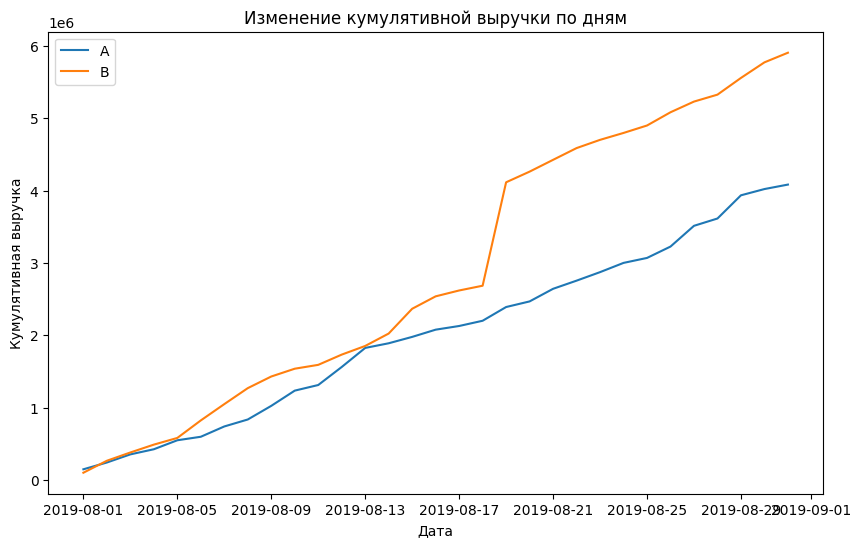

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData.query('group == "A"')[['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (10, 6))

#график кумулятивной выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#график кумулятивной выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Изменение кумулятивной выручки по дням')

plt.legend()
plt.show()

#### Вывод

Выручка увеличивается в течение всего теста, но если у группы А это происходит равномерно, то у группы В наблюдается скачкообразное повышение между 17.08.2019 и 21.08.2019. Предположительно, причина этого явления - выбросы (резкое увеличение числа заказов или очень дорогие заказы). 

### График кумулятивного среднего чека по группам

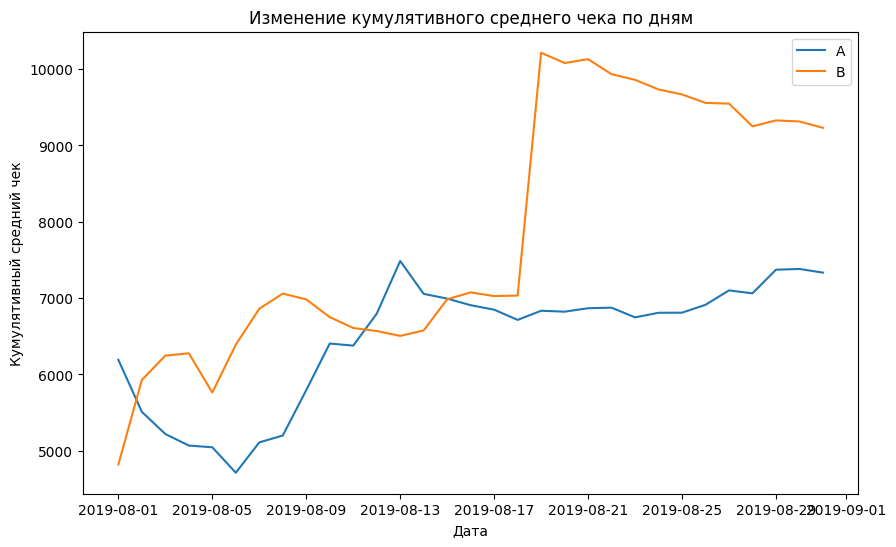

In [20]:
#График кумулятивного среднего чека по группам (делим выручку на число заказов)
plt.figure(figsize = (10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Изменение кумулятивного среднего чека по дням')

plt.legend() 
plt.show()

#### Вывод
Средний чек для группы А становится более равномерным ближе к концу теста, предположительно, установился. А для группы В наблюдается все тот же скачек между 17.08.2019 и 21.08.2019. Вероятно, в группу B в это время попали очень дорогие заказы. После, средний чек группы В начинает падать. Группе B нужно больше данных, чтобы придти к реальному среднему чеку и установиться.

### График относительного изменения кумулятивного среднего чека группы B к группе A

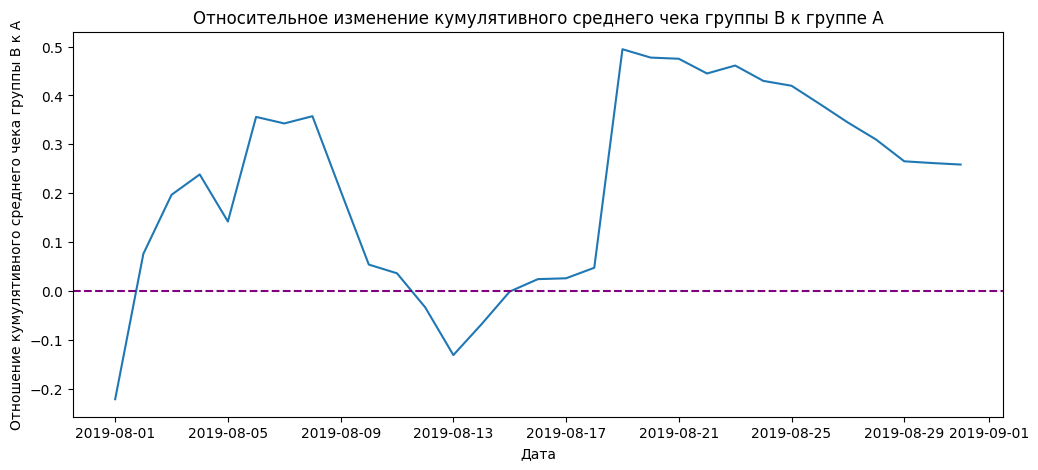

In [21]:
#объединим кумулятивные данные в одной таблице
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

#отношение среднего чека группы В к группе А 
plt.figure(figsize = (12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#ось X
plt.axhline(y=0, color='purple', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивного среднего чека группы B к A')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')

plt.show()

#### Вывод
График различия изменения среднего чека имеет 2 резких скачка. Это явно указывает на наличие выбросов,  крупных заказов.

### График кумулятивной конверсии по группам

In [22]:
#кумулятивная конверсия
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [23]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData.query('group == "A"')

# отделяем данные по группе B
cumulativeDataB = cumulativeData.query('group == "B"')

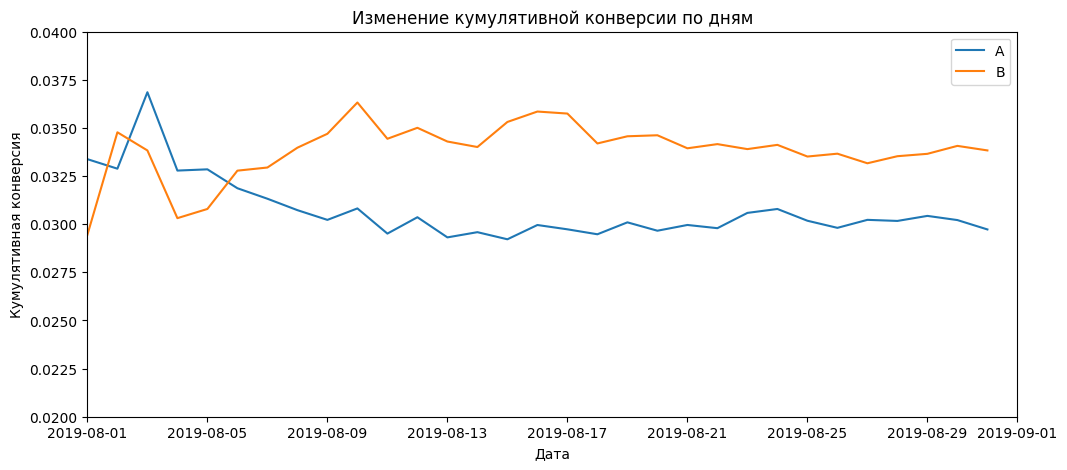

In [24]:
# графики кумулятивной конверсии
plt.figure(figsize = (12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0.02 , 0.04])

plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('Изменение кумулятивной конверсии по дням')

plt.show()

#### Вывод 
Сначала конверсия группы А была выше, но очень быстро упала и зафиксировалась на этом уровне. В то время как конверсия группы В начала расти и также зафиксировалась стабильно выше, чем у группы А. 

### График относительного изменения кумулятивной конверсии группы B к группе A 

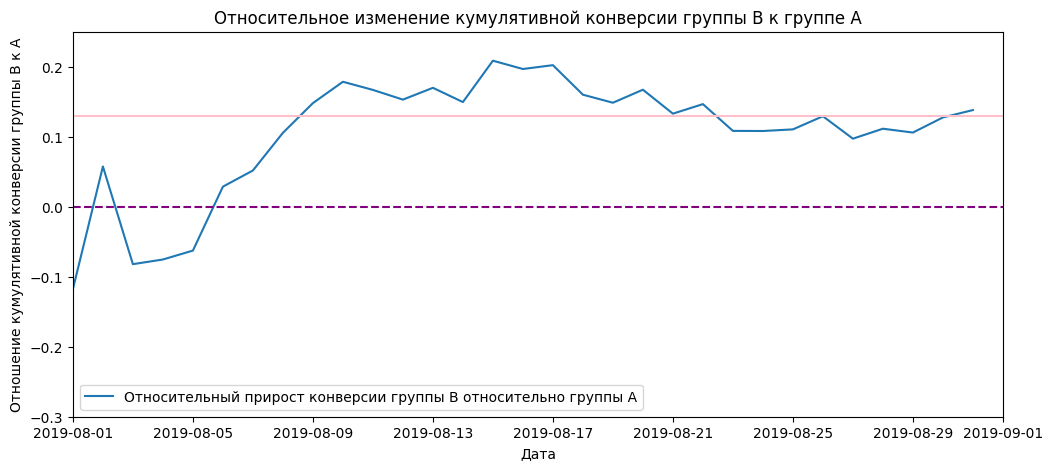

In [25]:
#собираем данные по кумулятивной конверсии в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

#построение графика
plt.figure(figsize = (12, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='purple', linestyle='--')
plt.axhline(y=0.13, color='pink', linestyle='-')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.3 , 0.25])

plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии группы В к А')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')

plt.show()

#### Вывод

В начале теста группа В немного проигрывала группе А, но потом вышла вперед и колеблется вдоль одной линии. Предположительно, отношение конверсии можно считать установившемся. 

### Точечный график количества заказов по пользователям

In [26]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']

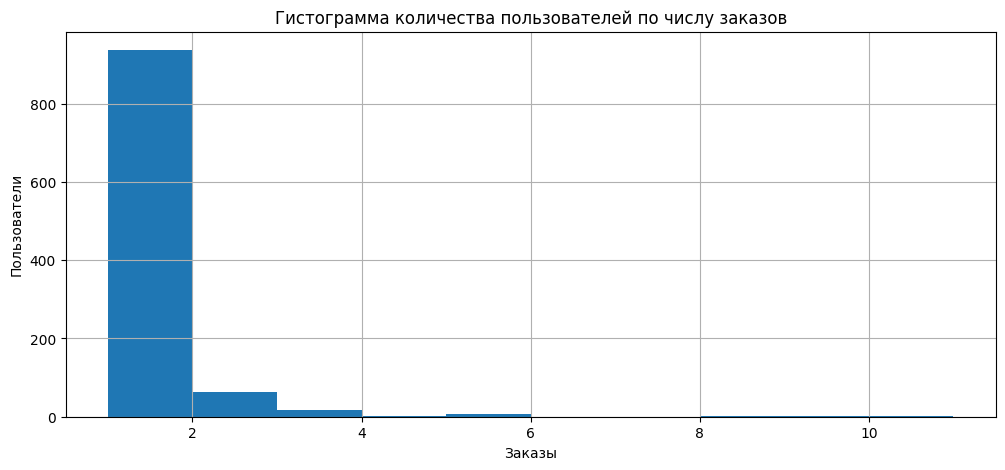

In [27]:
#гистограмма 
plt.figure(figsize = (12, 5))
ordersByUsers['orders'].hist(range=(1, 11))

plt.xlabel('Заказы')
plt.ylabel('Пользователи')
plt.title('Гистограмма количества пользователей по числу заказов')

plt.show()

Есть пользователи, которые совершают 11, 5, 4, 3 заказов, большинство покупателей заказывали только один раз. Но много пользователей с 2 и 3 заказами.

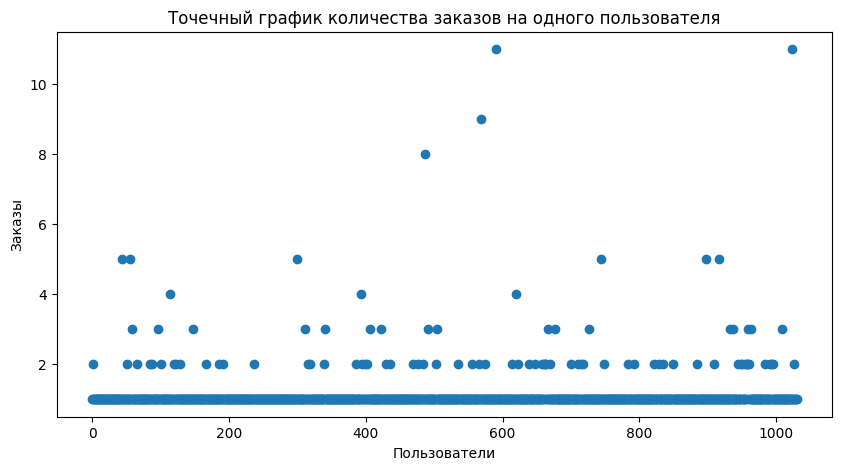

In [28]:
#построим точечную диаграмму числа заказов на одного пользователя
plt.figure(figsize = (10, 5)) 
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.title('Точечный график количества заказов на одного пользователя')

plt.show()

#### Вывод

Вывод из гистограммы подтверждается: много пользователей с 2-3 заказами. Но пока не ясно, нужно считать их выбросами или нет. Предположительно, все, что больше 3 заказов можно считать выбросами-аномалиями. Необходима проверка. 

### Подсчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [29]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


#### Вывод
Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более 1 раза. Не более 1 % заказали больше, чем 3 раза.
Следует взять 2 заказа как максимальное число заказов на пользователя и отсеять тех пользователей, у кого число заказов больше (принять их за аномальные).

### Точечный график стоимости заказов

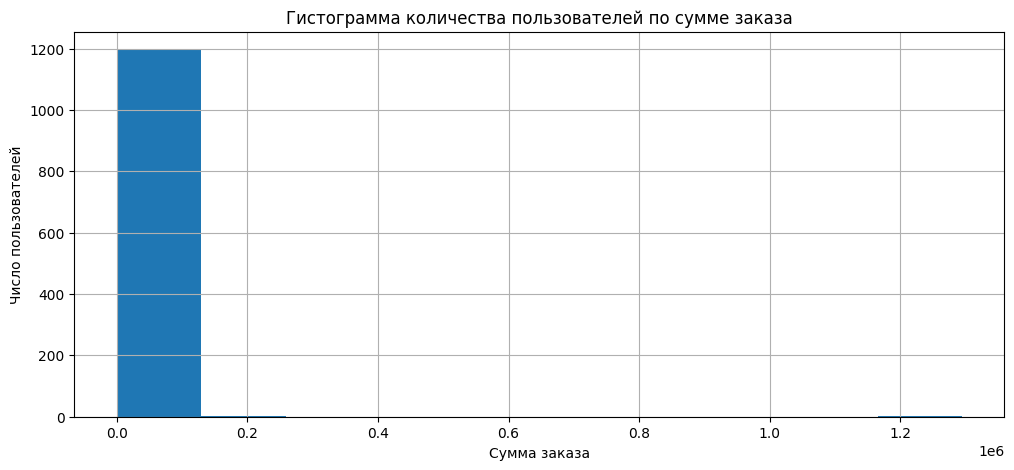

In [30]:
#предварительно построю гистограмму, чтобы посмотреть распределение сумм заказов
plt.figure(figsize = (12, 5))
orders['revenue'].hist()

plt.xlabel('Сумма заказа')
plt.ylabel('Число пользователей')
plt.title('Гистограмма количества пользователей по сумме заказа')

plt.show()

In [31]:
#гистограмма показала неожиданный результат, к тому же, странно выглядит шкала. Нужно посмотреть, 
#какие вообще есть значения в столбце 
orders['revenue'].describe()

count       1,197.000
mean        8,348.006
std        39,191.132
min            50.000
25%         1,220.000
50%         2,978.000
75%         8,290.000
max     1,294,500.000
Name: revenue, dtype: float64

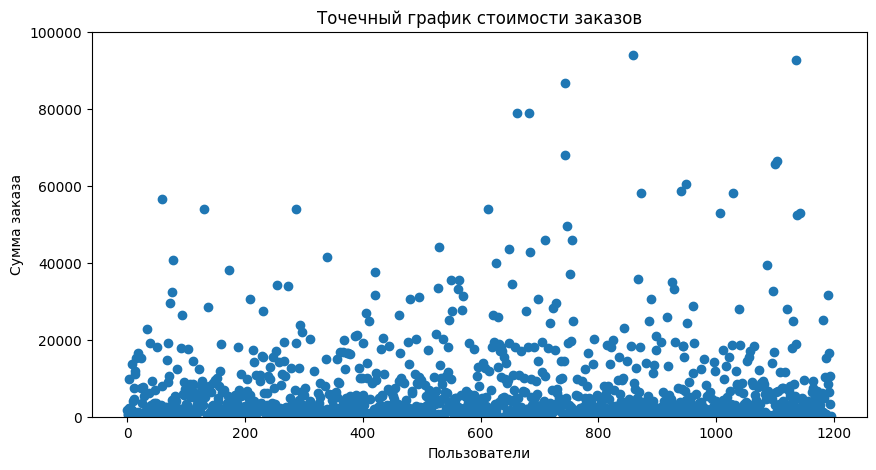

In [32]:
#здесь сразу видно максимальный заказ 1294500, который явно является выбросом. 
#построим точечную диаграмму стоимости заказов 
plt.figure(figsize = (10, 5))
plt.ylim([0, 100000]) #пришлось внести ограничения, так как из-за выбросов, график был не наглядный
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')
plt.title('Точечный график стоимости заказов')

plt.show()

#### Вывод

По диаграмме можно сделать вывод, что в данных есть очень большие выбросы. По графику, можно взять за выбросы заказы выше 40 000, но требуется проверка. 

### Подсчет 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов

In [33]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


#### Вывод
Не более 5% пользователей оформляли заказов дороже 28 000 и не более 1 % дороже 58 233. 
Следует взять 28000 за максимальную сумму заказа и отсеять те заказы, где сумма больше. 

### Подсчет статистической значимости различий в числе заказов (конверсии) между группами по «сырым» данным

In [34]:
#сгруппируем заказы по группам и для каждого платящего пользователя укажем число заказов
ordersByUsersA = orders.query('group == "A"').groupby('visitorId', as_index=False)\
    .agg({'transactionId': 'nunique'})
    
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders.query('group == "B"').groupby('visitorId', as_index=False)\
    .agg({'transactionId': 'nunique'})

ordersByUsersB.columns = ['userId', 'orders']


In [35]:
#создадим выборки с количеством заказов для платящих пользователей и нулями для не платящтх пользователей

visitsA = visitors.query('group == "A"')
sampleA = ordersByUsersA['orders'].append(pd.Series([0]*(visitsA['visitors'].sum()-ordersByUsersA.shape[0]),\
        name = 'orders'))

visitsB = visitors.query('group == "B"')
sampleB = ordersByUsersB['orders'].append(pd.Series([0]*(visitsB['visitors'].sum()-ordersByUsersB.shape[0]),\
        name = 'orders'))

In [36]:
#проверим нормальность выборок
#нулевая гипотеза - распределение нормально
#распределение не нормально

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleA)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение A: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение A не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу,  распределение A нормально') 

results = st.shapiro(sampleB)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение B: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу,  распределение B нормально')
    

p-значение A:  0.0
Отвергаем нулевую гипотезу: распределение A не нормально
p-значение B:  0.0
Отвергаем нулевую гипотезу: распределение B не нормально


In [37]:
#распределения не нормальны, для проверки используем критерий Манна-Уитни
#посчитаем статистическую значимость различия в числе заказов (конверсии) между группами.
#нулевая гипотеза - статистически значимых различий в числе заказов между группами нет
#альтернативная - различия есть

p_value = st.mannwhitneyu(sampleA, sampleB)[1]
print('p-value =', "{0:.3f}".format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в числе заказов между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу,статистически значимых различий в числе заказов между группами нет')

otn = (sampleB.mean() / sampleA.mean() - 1)*100
if otn > 0:
    print('Относительный выйгрыш группы B '"{0:.1f}".format(otn), '%')
else:
    print('Относительный проигрыш группы B '"{0:.1f}".format(otn), '%')


p-value = 0.017
Отвергаем нулевую гипотезу: статистически значимые различия в числе заказов между группами есть
Относительный выйгрыш группы B 13.8 %


#### Вывод
По сырым данным получено, что статистически значимые различия в числе заказов между группами есть и относительный выйгрыш группы B составил 13.8 %.

### Подсчет  статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [38]:
#нулевая гипотеза-  различий в среднем чеке между группами нет
#альтернативная - различия в среднем чеке между группами есть

p_value = st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]
print('p-value =', "{0:.3f}".format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу:  различия в среднем чеке между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет')

otn = (orders.query('group == "A"')['revenue'].mean()/orders.query('group == "B"')['revenue'].mean()-1)*100
if otn > 0:
    print('Относительный выйгрыш группы B '"{0:.1f}".format(otn), '%')
else:
    print('Относительный проигрыш группы B '"{0:.1f}".format(otn), '%') 

p-value = 0.729
Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет
Относительный проигрыш группы B -20.6 %


#### Вывод
Тест показал, что статистически значимых различий между средними чеками в группах нет. Но относительный проигрыш группы В составил 20,6%, это существенная разница. Возможно, после чистки выбросов, ситуация изменится. 

### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным

In [39]:
#сначала произведем очистку данных

quant95 = ordersByUsers['orders'].quantile(0.95).round(0)
ordersByUsersAfiltr = ordersByUsersA.query('orders <= @quant95')

ordersByUsersBfiltr = ordersByUsersB.query('orders <= @quant95')

In [40]:
#создадим выборки с количеством заказов для платящих пользователей и нулями для не платящтх пользователей
#по очищенным данным 

visitsA = visitors.query('group == "A"')
sampleAFiltered = ordersByUsersAfiltr['orders'].append(pd.Series([0]*(visitsA['visitors'].sum()-ordersByUsersAfiltr.shape[0]),\
        name = 'orders'))

visitsB = visitors.query('group == "B"')
sampleBFiltered = ordersByUsersBfiltr['orders'].append(pd.Series([0]*(visitsB['visitors'].sum()-ordersByUsersBfiltr.shape[0]),\
        name = 'orders'))

In [41]:
#посчитаем статистическую значимость различия в числе заказов (конверсии) между группами по очищенным данным
#нулевая гипотеза - статистически значимых различий в числе заказов между группами по очищенным данным нет
#альтернативная - различия есть

p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p -value =', "{0:.3f}".format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в числе заказов между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу,статистически значимых различий в числе заказов между группами нет')

otn = (sampleAFiltered.mean() / sampleBFiltered.mean() - 1)*100
if otn > 0:
    print('Относительный выйгрыш группы B '"{0:.1f}".format(otn), '%')
else:
    print('Относительный проигрыш группы B '"{0:.1f}".format(otn), '%')

p -value = 0.013
Отвергаем нулевую гипотезу: статистически значимые различия в числе заказов между группами есть
Относительный проигрыш группы B -14.4 %


По не очищеным дынным было:
p-value = 0.017

Отвергаем нулевую гипотезу: статистически значимые различия в числе заказов между группами есть.
Относительный выйгрыш группы B 13.8 %

#### Вывод
По очищенным данным статистически значимые различия в числе заказов между группами есть, как и по не очищенным. Однако, после очистки данных оказалось, что число заказов группы B значительно ниже числа заказов группы A, а не наоборот, как было раньше. 

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [42]:
#сначала произведем очистку данных

quant_95 = orders['revenue'].quantile(0.95).round(0)

ordersfiltr = orders.query('revenue <= @quant_95')

In [43]:
#нулевая гипотеза - различий в среднем чеке между группами нет
#альтернативная - различия в среднем чеке между группами есть

p_value = st.mannwhitneyu(ordersfiltr.query('group == "A"')['revenue'],ordersfiltr.query('group == "B"')['revenue'])[1]
print('p-value =', "{0:.3f}".format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу:  различия в среднем чеке между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет')

otn = (ordersfiltr.query('group == "A"')['revenue'].mean()/ordersfiltr.query('group == "B"')['revenue'].mean()-1)*100
if otn > 0:
    print('Относительный выйгрыш группы B '"{0:.1f}".format(otn), '%')
else:
    print('Относительный проигрыш группы B '"{0:.1f}".format(otn), '%') 

p-value = 0.852
Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет
Относительный выйгрыш группы B 1.6 %


Было по "сырым" данным:

p-value = 0.729

Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет

Относительный проигрыш группы B -20.6 %

#### Вывод
Общий вывод по очищенным данным не изменился: различий в среднем чеке между группами нет. Но оказалось, что средний чек группы B немного выше среднего чека группы A. В то время как по "сырым" данным, чек группы B был значительно ниже среднего чека группы A.

### Решение по результатам теста

Есть статистически значимые различия в числе заказов между группами, как по очищенным, так и по "сырым" данным.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к улучшению.

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации
аномалий.

График различия среднего чека говорит о том, что результаты группы B имеют 2 резких скачка и сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным по конверсии пользователей. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B уступит сегменту А по конверсии — практически нулевая. Также, вероятность, что есть различия в средних чеках между группами - практически нулевая.